Rain Prediction in Australia - v3

### 1- Problem?

I will try to answer the question of whether or not it will rain tomorrow in Australia. 

To answer the question, I build a classifier to predict whether or not it will rain tomorrow in Australia. 
I used a binary classification model using Logistic Regression.
I have used the Rain in Australia dataset for this project.

Implementation of Rain Prediction in Australia by Logistic Regression with Python and Scikit-Learn.

### 2- Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

### 3- Import dataset

In [4]:
rain = 'E:/AMotefaker/ABC/Data Science/IBM Data Science Professional Certificate/9-Machine Learning with Python/Project/Rain Prediction in Australia - v1/weatherAUS.csv'

df = pd.read_csv(rain)

### 4- Exploratory data analysis

#### Dimensions of dataset

In [6]:
df.shape

(145460, 23)

We can see that there are 141454602193 instances and 23 variables in the data set.

#### Preview the dataset 

In [7]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#### View column names

In [8]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

#### View summary of dataset 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

##### Tips:

We can see that the dataset contains a mixture of categorical and numerical variables.

Categorical variables have data-type object.

Numerical variables have data type float64.

There are some missing values in the dataset. We will explore it later.

#### View statistical properties of dataset

In [11]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


##### Important points:
The above command df.describe() helps us to view the statistical properties of numerical variables. It excludes character variables.

If we want to view the statistical properties of character variables, we should run the following command:

     df.describe(include=['object'])

If we want to view the statistical properties of all the variables, we should run the following command:

     df.describe(include='all')

###  5- Univariate Analysis 

#### Explore "RainTomorrow"  target variable

##### Check for missing values

In [12]:
df['RainTomorrow'].isnull().sum()

3267

We can see that there are 3267 missing values in the Rain Tomorrow target variable.

##### View number of unique values

In [13]:
df['RainTomorrow'].nunique()

2

We can see that the number of unique values in RainTomorrow variable is 2.

##### View the unique values

In [14]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

The three unique values are No,Yes and nan.

##### View the frequency distribution of values

In [15]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

##### View percentage of frequency distribution of values

In [17]:
df['RainTomorrow'].value_counts()/len(df)

No     0.758394
Yes    0.219146
Name: RainTomorrow, dtype: float64

##### Tips:

We can see that out of the total number of RainTomorrow values, No appears 75.84% times and Yes appears 21.91% times.

##### Visualize frequency distribution of RainTomorrow variable

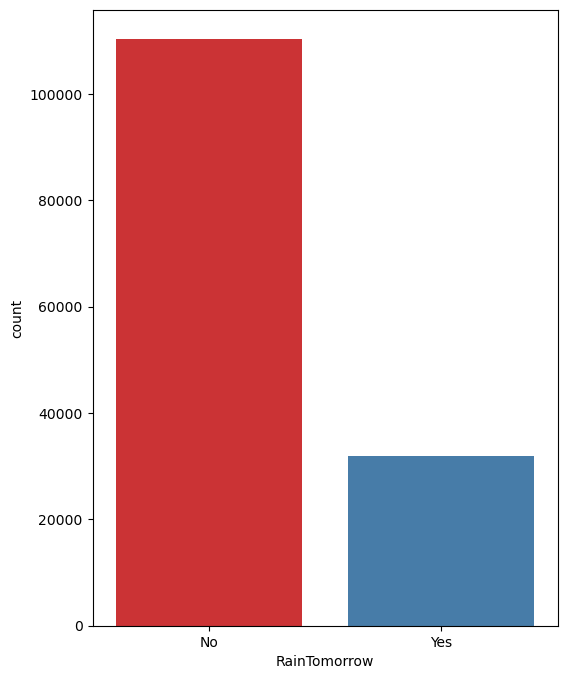

In [18]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

##### Tips:
    The above univariate plot confirms our findings that:
        The No variable have 110316 entries
        The Yes variable have 31877 entries.

##### Plot the bars horizontally

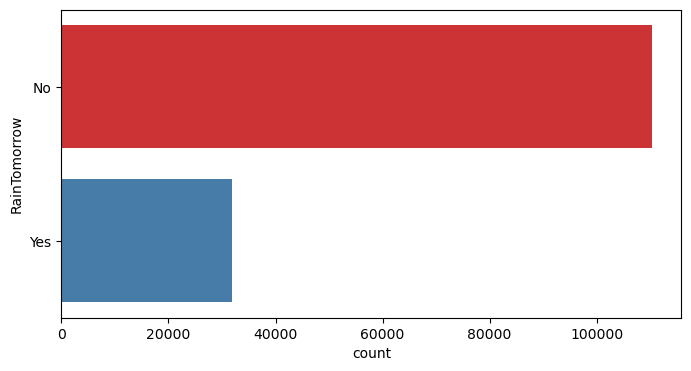

In [19]:
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(y="RainTomorrow", data=df, palette="Set1")
plt.show()

##### Findings of Univariate Analysis:
    The number of missing values in RainTomorrow variable is 3267.
    The number of unique values in RainTomorrow variable is 2.
    The three unique values are No,Yes and nan.
    The total number of RainTomorrow values, No appears 75.84% times and Yes appears 21.91% times.
    The univariate plot confirms our findings that:
        The No variable have 110316 entries
        The Yes variable have 31877 entries    